## Topic : 80 CEREALS

**Overview :**
If you like to eat cereal, do yourself a favor and avoid this dataset at all costs. After seeing these data it will never be the same for me to eat Fruity Pebbles again.

For dataset click [here](https://www.kaggle.com/datasets/crawford/80-cereals?resource=download).

**Content :**
- Name: Name of cereal
- mfr: Manufacturer of cereal
    - A = American Home Food Products;
    - G = General Mills
    - K = Kelloggs
    - N = Nabisco
    - P = Post
    - Q = Quaker Oats
    - R = Ralston Purina
- Type: cold and hot
- calories: calories per serving
- protein: grams of protein
- fat: grams of fat
- sodium: milligrams of sodium
- fiber: grams of dietary fiber
- carbo: grams of complex carbohydrates
- sugars: grams of sugars
- potass: milligrams of potassium
- vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
- shelf: display shelf (1, 2, or 3, counting from the floor)
- weight: weight in ounces of one serving
- cups: number of cups in one serving
- rating: a rating of the cereals

**There are many potential angles to explore, such as:**
1. Nutritional analysis: How do different cereals compare in terms of calories, sugar, fiber, and other nutrients?
2. Manufacturer analysis: Are there any differences in cereal characteristics between manufacturers?
3. Rating analysis: What factors contribute to a cereal's rating, and are there any correlations between ratings and nutritional content?

**The steps are broadly:**
1. Read and understand the data.
2. Clean the data.
3. Data visualization and understanding.
4. Exploring different potential angles.

## Step 1: Reading and understanding the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import io
from sklearn.linear_model import HuberRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("cereal.csv")
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
df.shape

(77, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


In [6]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [7]:
df.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [8]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

## Step 2: Data Cleaning

In [9]:
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [10]:
df['rating'] = df['rating'].round(2)

In [11]:
# Dictionary to map abbreviations to full names
mfr_mapping = {
    'A': 'American Home Food Products',
    'G': 'General Mills',
    'K': 'Kelloggs',
    'N': 'Nabisco',
    'P': 'Post',
    'Q': 'Quaker Oats',
    'R': 'Ralston Purina'
}

In [12]:
# Replace abbreviations with full names in the 'mfr' column
df['mfr'] = df['mfr'].map(mfr_mapping)

In [13]:
df['Brand'] = df['name'] + ' - ' + df['mfr']

In [14]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Brand
0,100% Bran,Nabisco,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.40,100% Bran - Nabisco
1,100% Natural Bran,Quaker Oats,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.98,100% Natural Bran - Quaker Oats
2,All-Bran,Kelloggs,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.43,All-Bran - Kelloggs
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.70,All-Bran with Extra Fiber - Kelloggs
4,Almond Delight,Ralston Purina,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.38,Almond Delight - Ralston Purina


In [15]:
df.nunique().tolist()

[77, 7, 2, 11, 6, 5, 27, 13, 22, 17, 36, 3, 3, 7, 12, 77, 77]

In [16]:
## checking count of unique values in each column
for i in df.columns:
    print(df[i].value_counts())

name
Wheaties Honey Gold          1
100% Bran                    1
100% Natural Bran            1
All-Bran                     1
All-Bran with Extra Fiber    1
                            ..
Bran Chex                    1
Bran Flakes                  1
Cap'n'Crunch                 1
Cheerios                     1
Cinnamon Toast Crunch        1
Name: count, Length: 77, dtype: int64
mfr
Kelloggs                       23
General Mills                  22
Post                            9
Ralston Purina                  8
Quaker Oats                     8
Nabisco                         6
American Home Food Products     1
Name: count, dtype: int64
type
C    74
H     3
Name: count, dtype: int64
calories
110    29
100    17
120    10
90      7
50      3
140     3
70      2
130     2
150     2
160     1
80      1
Name: count, dtype: int64
protein
3    28
2    25
1    13
4     8
6     2
5     1
Name: count, dtype: int64
fat
1    30
0    27
2    14
3     5
5     1
Name: count, dtype: int64
sodi

In [17]:
## Converting 'sodium' and 'potass' from milligrams to grams:
df['sodium'] = df['sodium'].apply(lambda x: x * 0.001)
df['potass'] = df['potass'].apply(lambda x: x * 0.001)

In [18]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Brand
0,100% Bran,Nabisco,C,70,4,1,0.130,10.0,5.0,6,0.280,25,3,1.0,0.33,68.40,100% Bran - Nabisco
1,100% Natural Bran,Quaker Oats,C,120,3,5,0.015,2.0,8.0,8,0.135,0,3,1.0,1.00,33.98,100% Natural Bran - Quaker Oats
2,All-Bran,Kelloggs,C,70,4,1,0.260,9.0,7.0,5,0.320,25,3,1.0,0.33,59.43,All-Bran - Kelloggs
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,0.140,14.0,8.0,0,0.330,25,3,1.0,0.50,93.70,All-Bran with Extra Fiber - Kelloggs
4,Almond Delight,Ralston Purina,C,110,2,2,0.200,1.0,14.0,8,-0.001,25,3,1.0,0.75,34.38,Almond Delight - Ralston Purina


In [19]:
df['sodium'] = df['sodium'].round(2)
df['potass'] = df['potass'].round(2)

In [20]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Brand
0,100% Bran,Nabisco,C,70,4,1,0.13,10.0,5.0,6,0.28,25,3,1.0,0.33,68.40,100% Bran - Nabisco
1,100% Natural Bran,Quaker Oats,C,120,3,5,0.02,2.0,8.0,8,0.14,0,3,1.0,1.00,33.98,100% Natural Bran - Quaker Oats
2,All-Bran,Kelloggs,C,70,4,1,0.26,9.0,7.0,5,0.32,25,3,1.0,0.33,59.43,All-Bran - Kelloggs
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,0.14,14.0,8.0,0,0.33,25,3,1.0,0.50,93.70,All-Bran with Extra Fiber - Kelloggs
4,Almond Delight,Ralston Purina,C,110,2,2,0.20,1.0,14.0,8,-0.00,25,3,1.0,0.75,34.38,Almond Delight - Ralston Purina


In [21]:
df['shelf'].unique()

array([3, 1, 2])

In [22]:
## converting shelf to categorical column:
df['shelf'] = df['shelf'].map({1: 'A', 2: 'B', 3: 'C'})

In [23]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Brand
0,100% Bran,Nabisco,C,70,4,1,0.13,10.0,5.0,6,0.28,25,C,1.0,0.33,68.40,100% Bran - Nabisco
1,100% Natural Bran,Quaker Oats,C,120,3,5,0.02,2.0,8.0,8,0.14,0,C,1.0,1.00,33.98,100% Natural Bran - Quaker Oats
2,All-Bran,Kelloggs,C,70,4,1,0.26,9.0,7.0,5,0.32,25,C,1.0,0.33,59.43,All-Bran - Kelloggs
3,All-Bran with Extra Fiber,Kelloggs,C,50,4,0,0.14,14.0,8.0,0,0.33,25,C,1.0,0.50,93.70,All-Bran with Extra Fiber - Kelloggs
4,Almond Delight,Ralston Purina,C,110,2,2,0.20,1.0,14.0,8,-0.00,25,C,1.0,0.75,34.38,Almond Delight - Ralston Purina


## Step 4: Data Visualization and Understanding

In [24]:
dtypes = df.dtypes

In [25]:
## Segregating columns in categorical and numerical columns:

cat_cols=[]    # categorical columns
num_cols=[]   # numeric columns
for col, dtype in dtypes.items():
    if dtype == 'object':  # categorical columns have 'object' data type
        cat_cols.append(col)
    elif dtype in ['int64', 'float64']:  # numerical columns have 'int64' or 'float64' data type
        num_cols.append(col)

In [26]:
print(cat_cols)
print(num_cols)

['name', 'mfr', 'type', 'shelf', 'Brand']
['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups', 'rating']


**Visualizing numerical columns using boxplots**

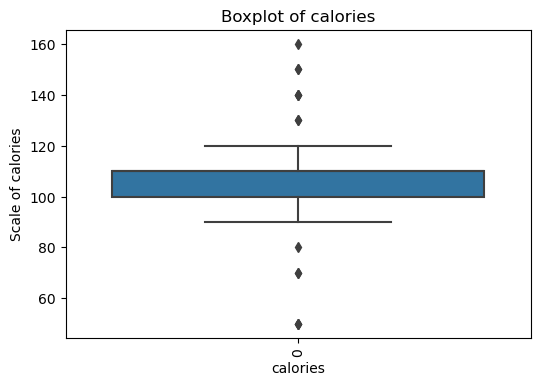

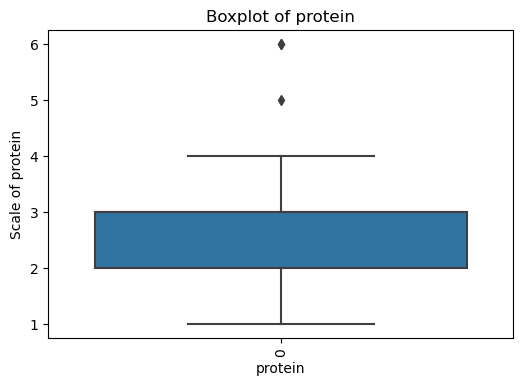

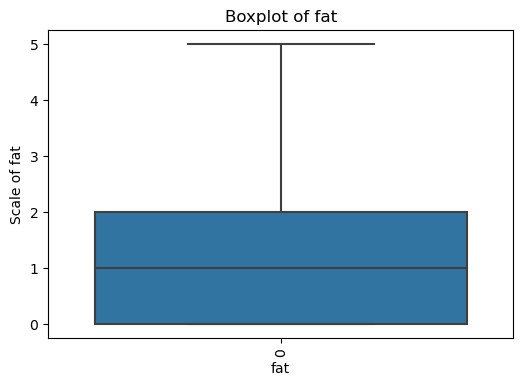

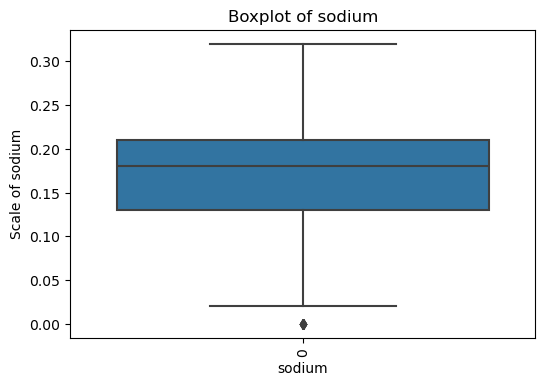

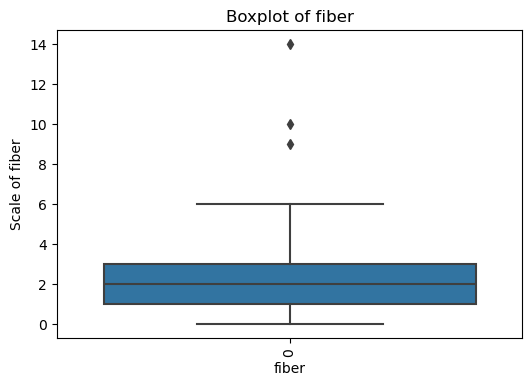

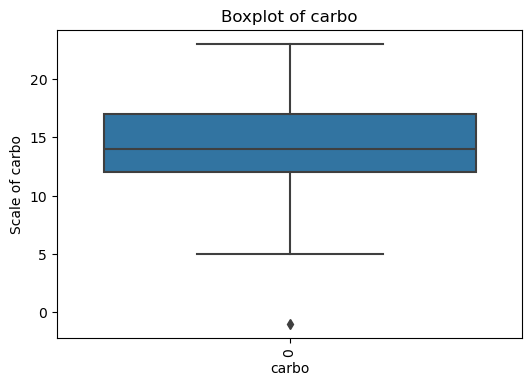

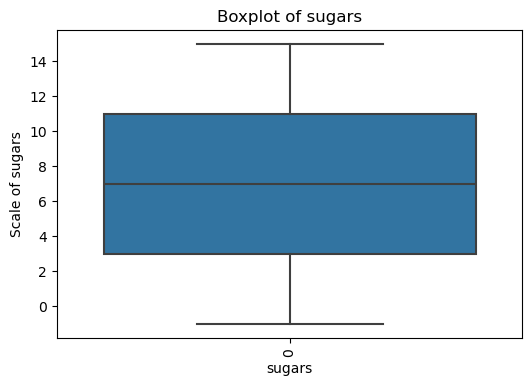

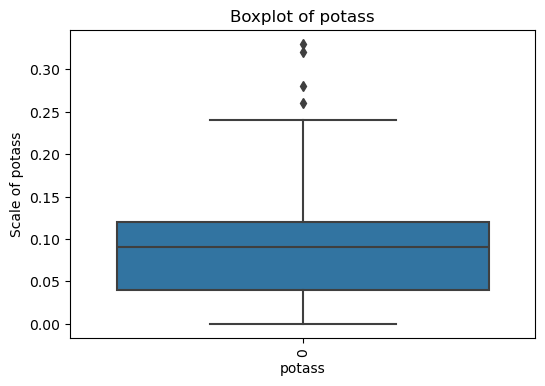

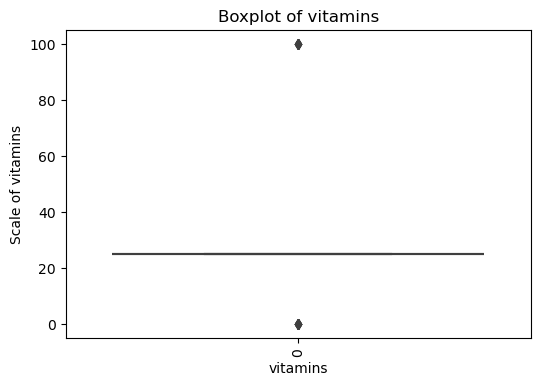

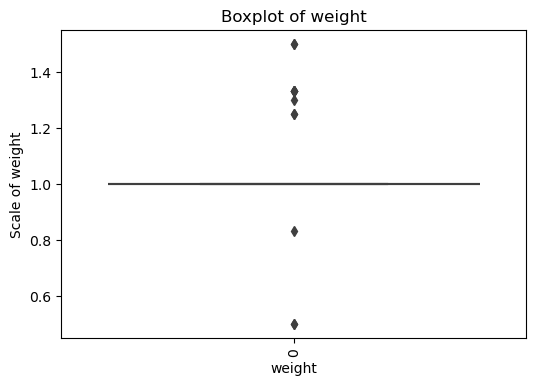

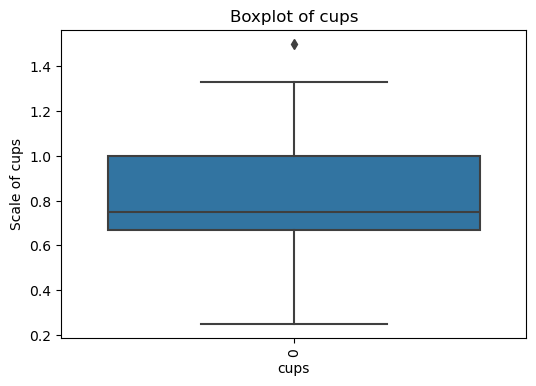

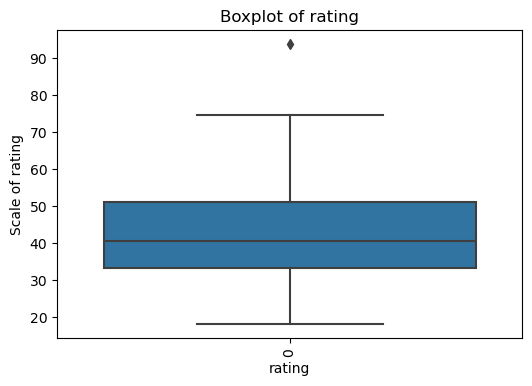

In [71]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel(f'Scale of {col}')
    plt.xticks(rotation=90)
    plt.show()

**Visualizing numerical columns using histogram**

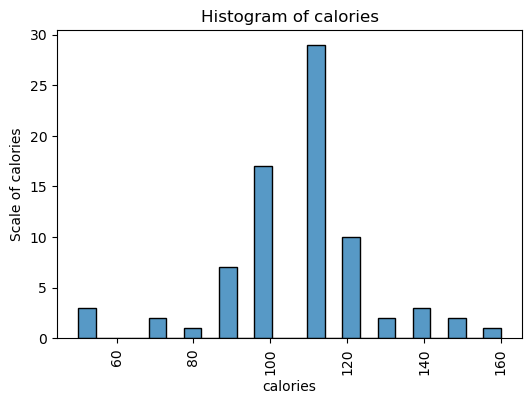

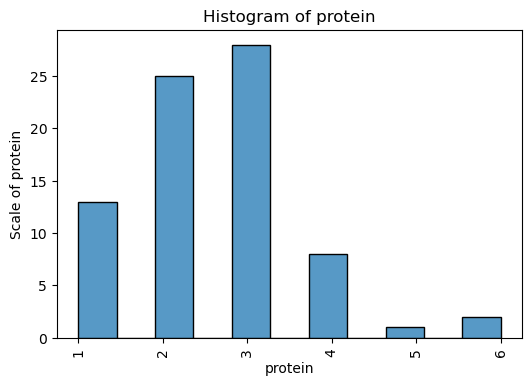

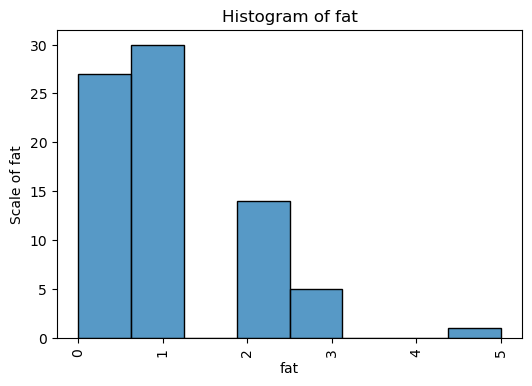

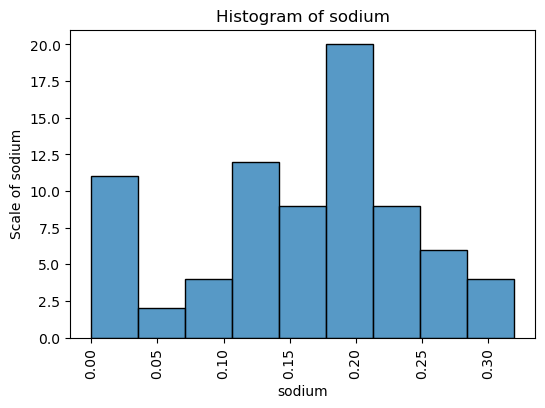

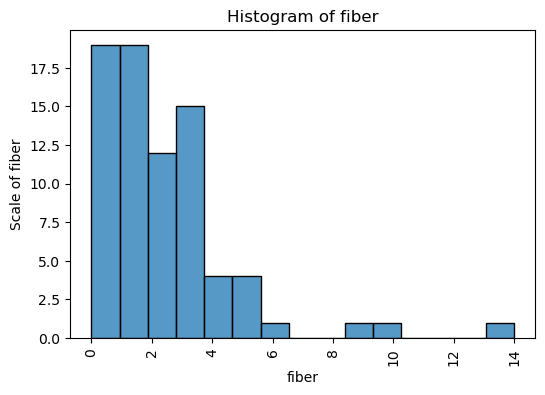

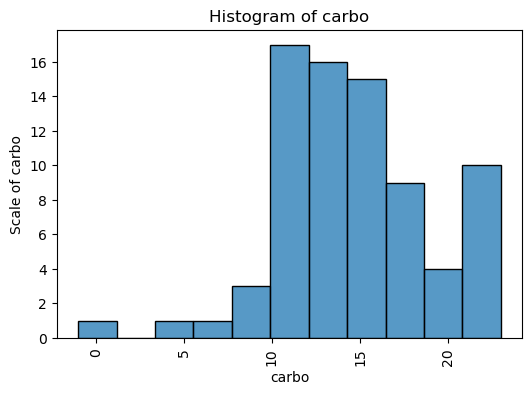

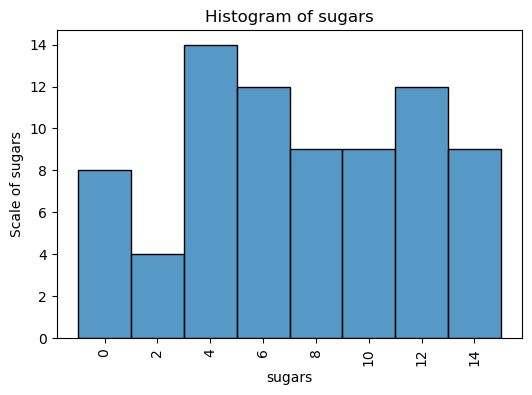

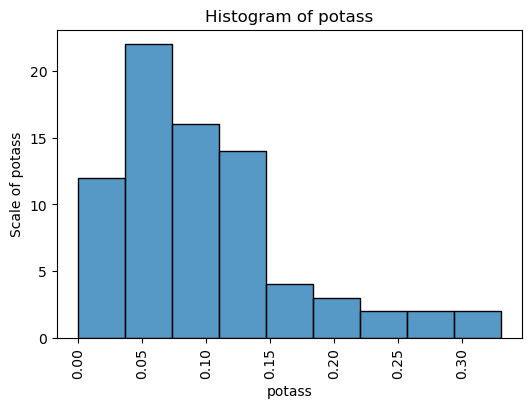

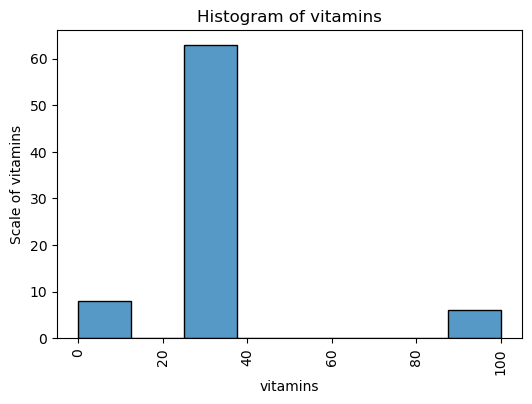

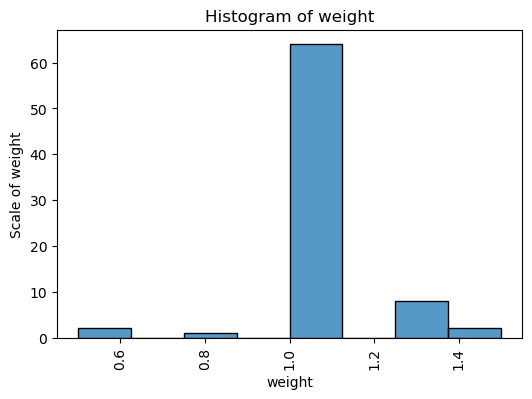

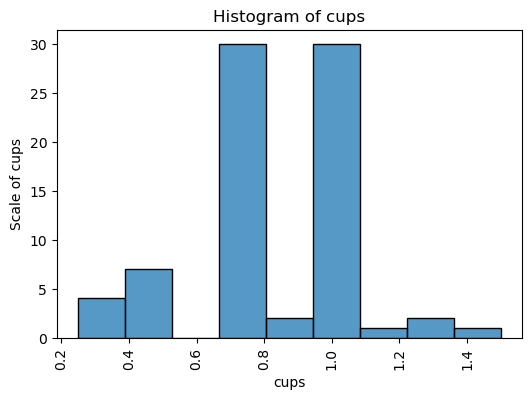

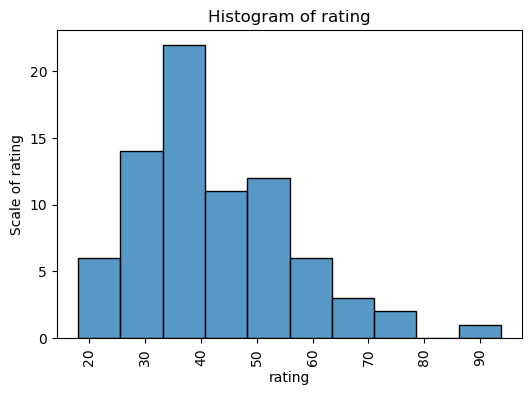

In [73]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel(f'Scale of {col}')
    plt.xticks(rotation=90)
    plt.show()

*Upon analyzing the box plots for numerical columns it seems that there are some columns which contains outliers however, considering this is a cereals data there can be some brands that contains high or very low amount of calories, potass and other nutrients. Hence, we will leave them as it is and will include them in the analysis to get accurate result.*

**Visualizing categorical columns using countplots**

In [29]:
df[cat_cols].dtypes

name     object
mfr      object
type     object
shelf    object
Brand    object
dtype: object

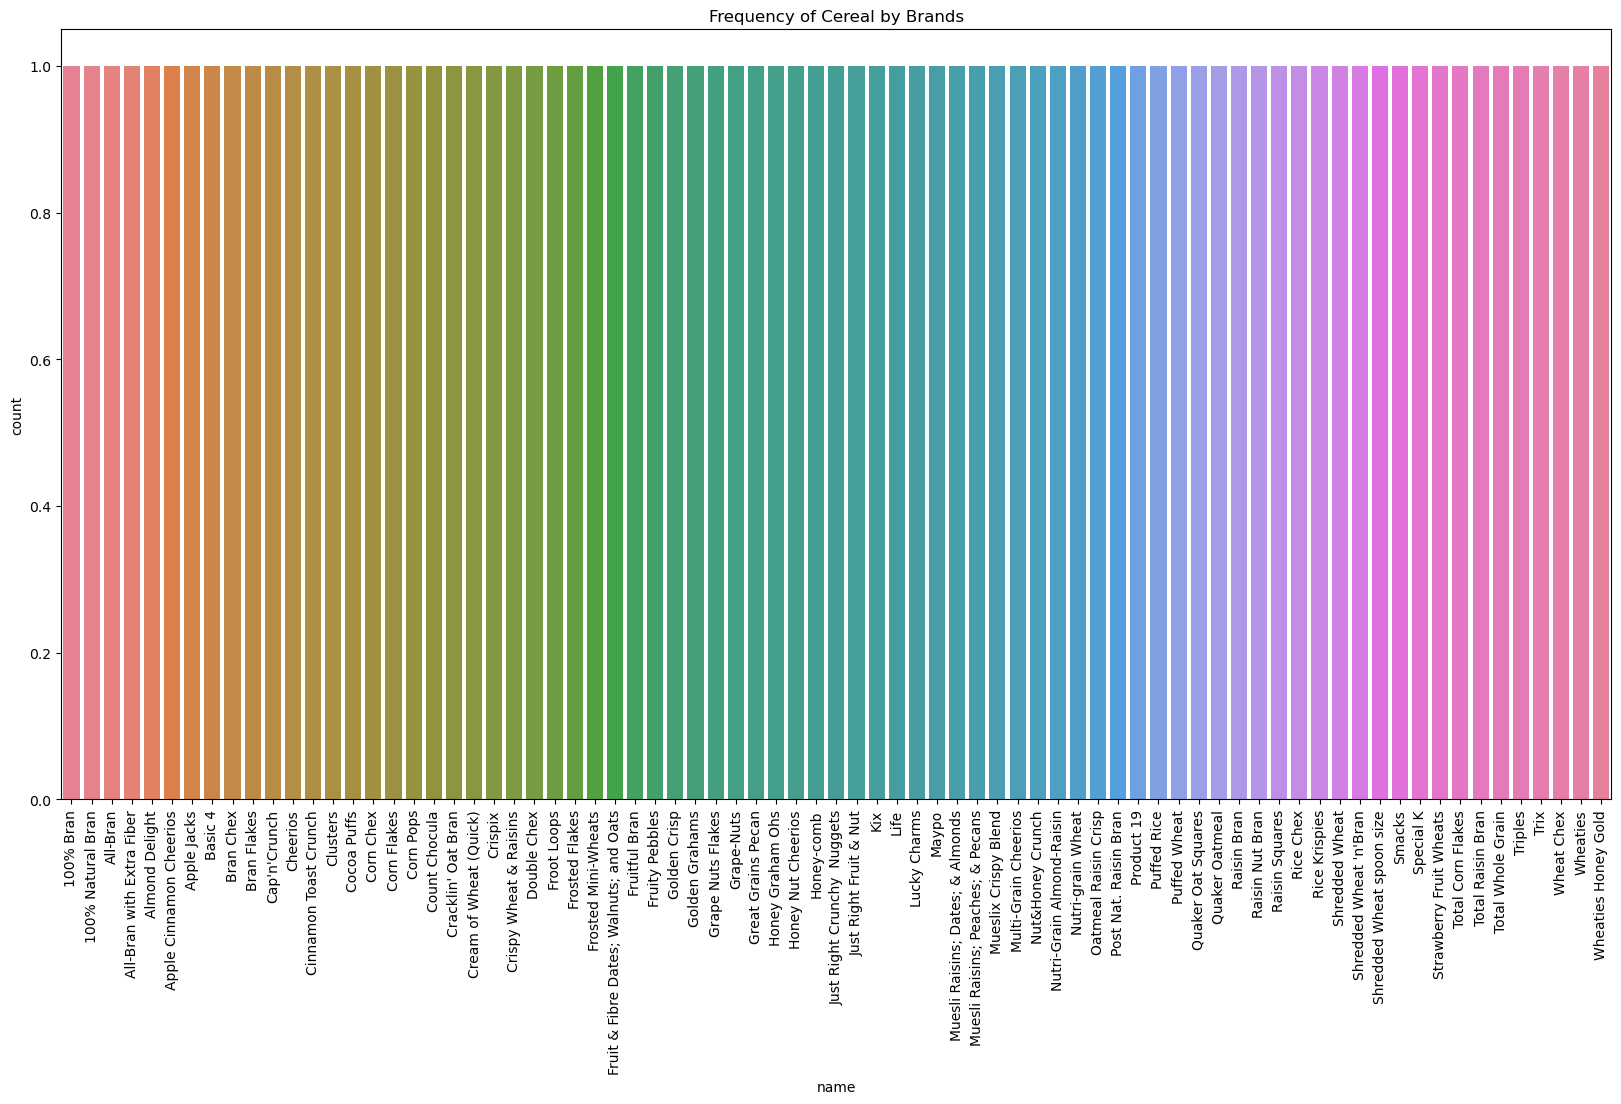

In [30]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x= "name", palette="husl")
plt.title('Frequency of Cereal by Brands')
plt.xticks(rotation=90)
plt.show()

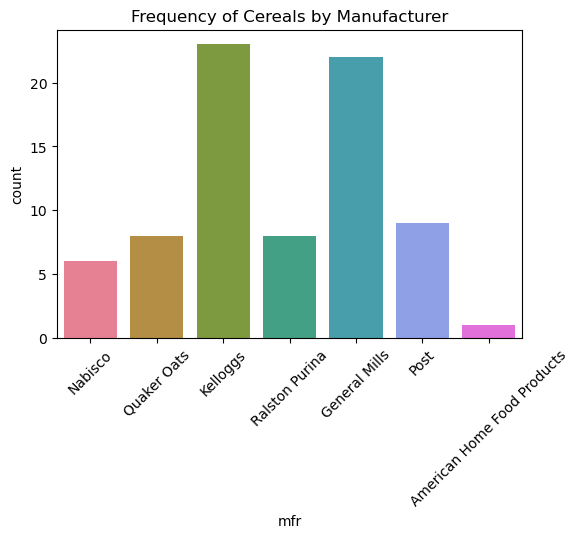

In [74]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x= "mfr", palette="husl")
plt.title('Frequency of Cereals by Manufacturer')
plt.xticks(rotation=45)
plt.show()

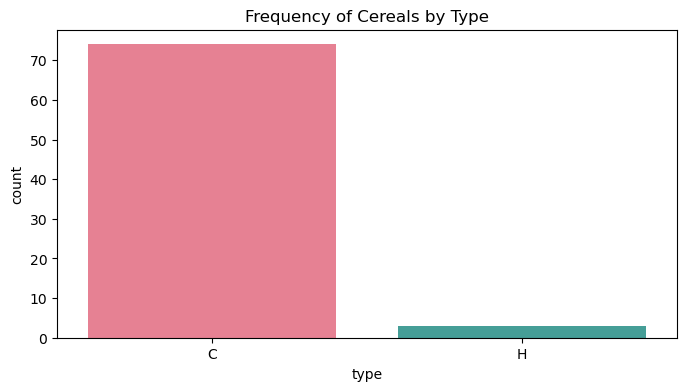

In [75]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x= "type", palette="husl")
plt.title('Frequency of Cereals by Type')
plt.show()

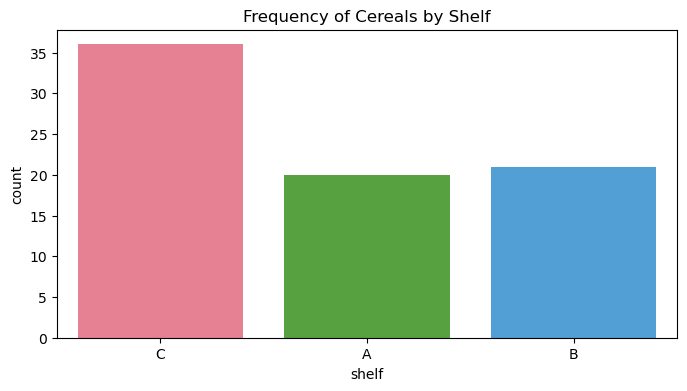

In [76]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x= "shelf", palette="husl")
plt.title('Frequency of Cereals by Shelf')
plt.show()

**visualizing numerical columns using pairplot**

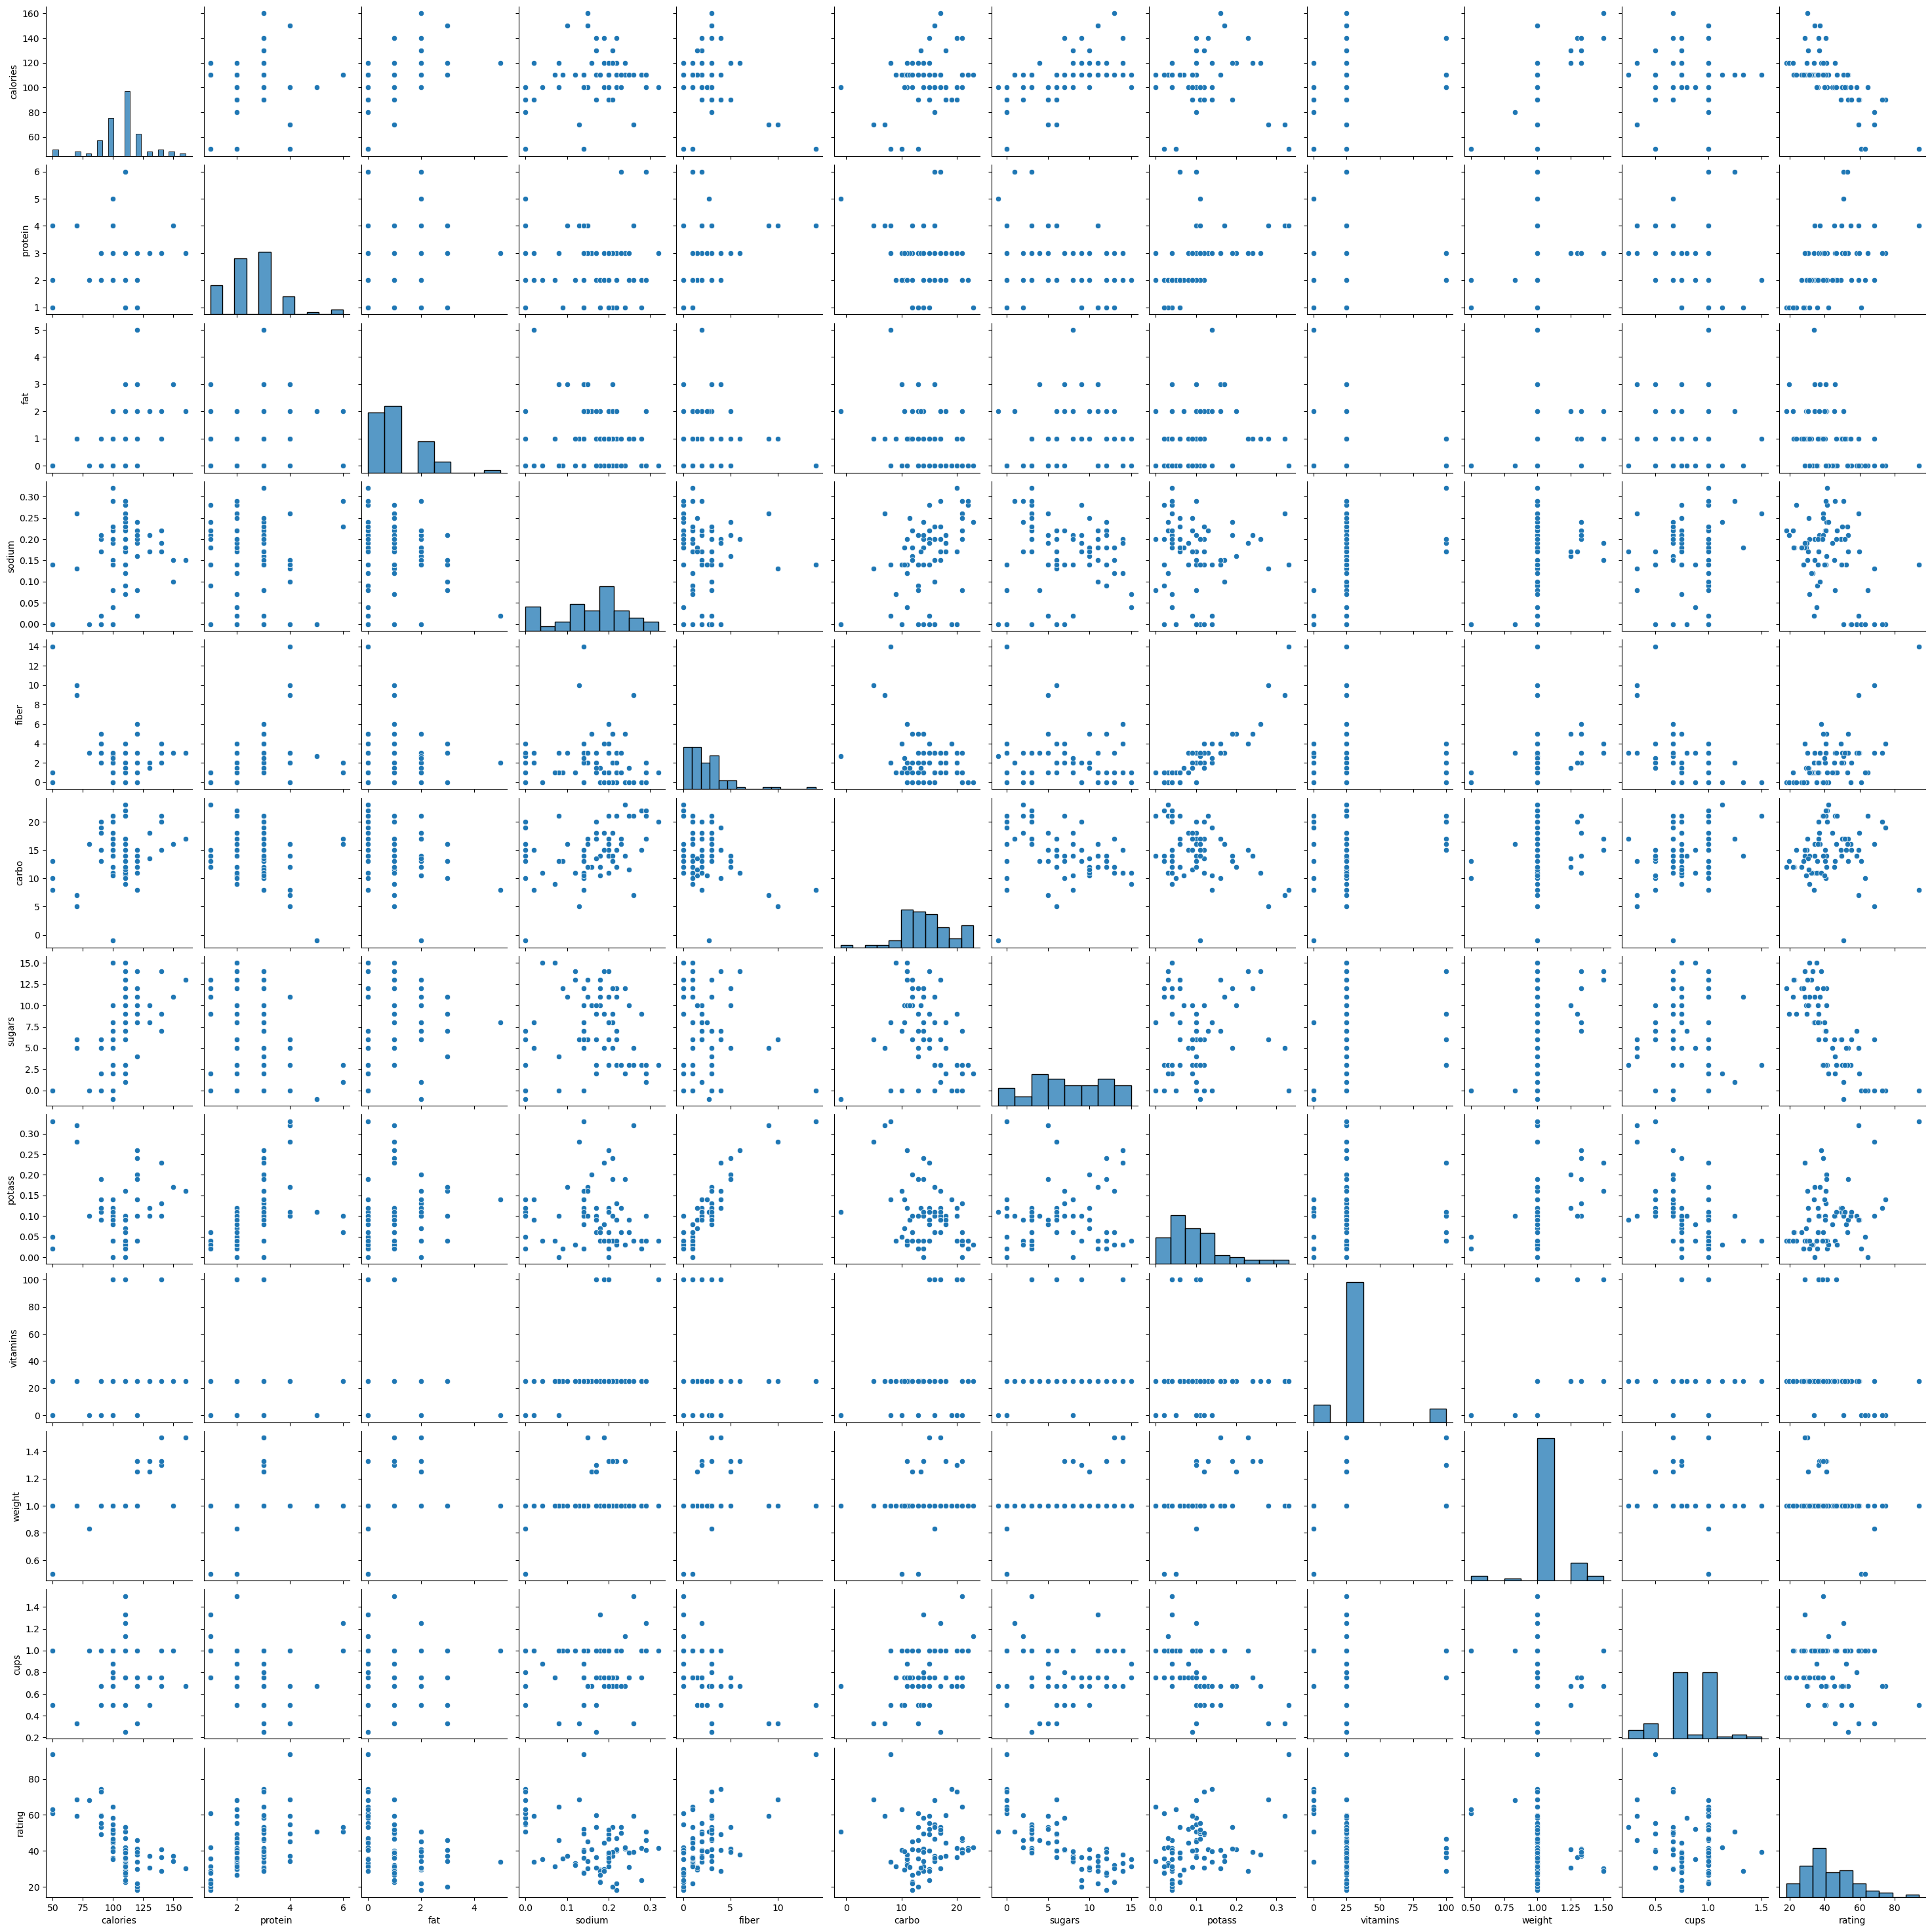

In [34]:
sns.pairplot(df[num_cols])
plt.show()

In [35]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating', 'Brand'],
      dtype='object')

## Angle 1: Nutritional Analysis

**1. Calorie Analysis**

In [36]:
###75th percentile

def p75(x):
  return np.quantile(x,0.75)

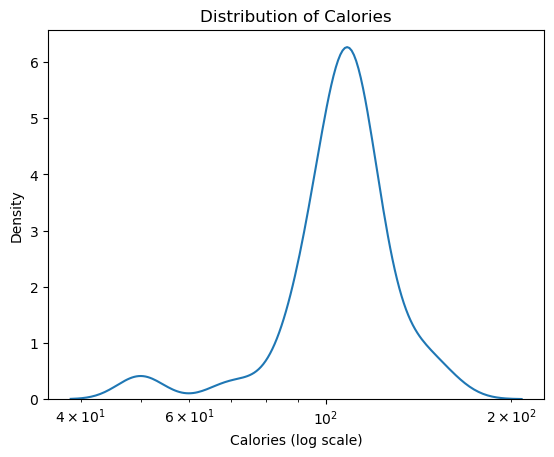

In [37]:
# Creating a density plot with a logarithmic scale
sns.kdeplot(x="calories", data=df, log_scale=True)
plt.title("Distribution of Calories")
plt.xlabel("Calories (log scale)")
plt.ylabel("Density")
plt.show()

In [38]:
brand_calories = df.groupby("Brand")["calories"].aggregate(["mean", "median", p75])
brand_calories

,mean,median,p75
Brand,,,
100% Bran - Nabisco,70.0,70.0,70.0
100% Natural Bran - Quaker Oats,120.0,120.0,120.0
All-Bran - Kelloggs,70.0,70.0,70.0
All-Bran with Extra Fiber - Kelloggs,50.0,50.0,50.0
Almond Delight - Ralston Purina,110.0,110.0,110.0
...,...,...,...
Triples - General Mills,110.0,110.0,110.0
Trix - General Mills,110.0,110.0,110.0
Wheat Chex - Ralston Purina,100.0,100.0,100.0


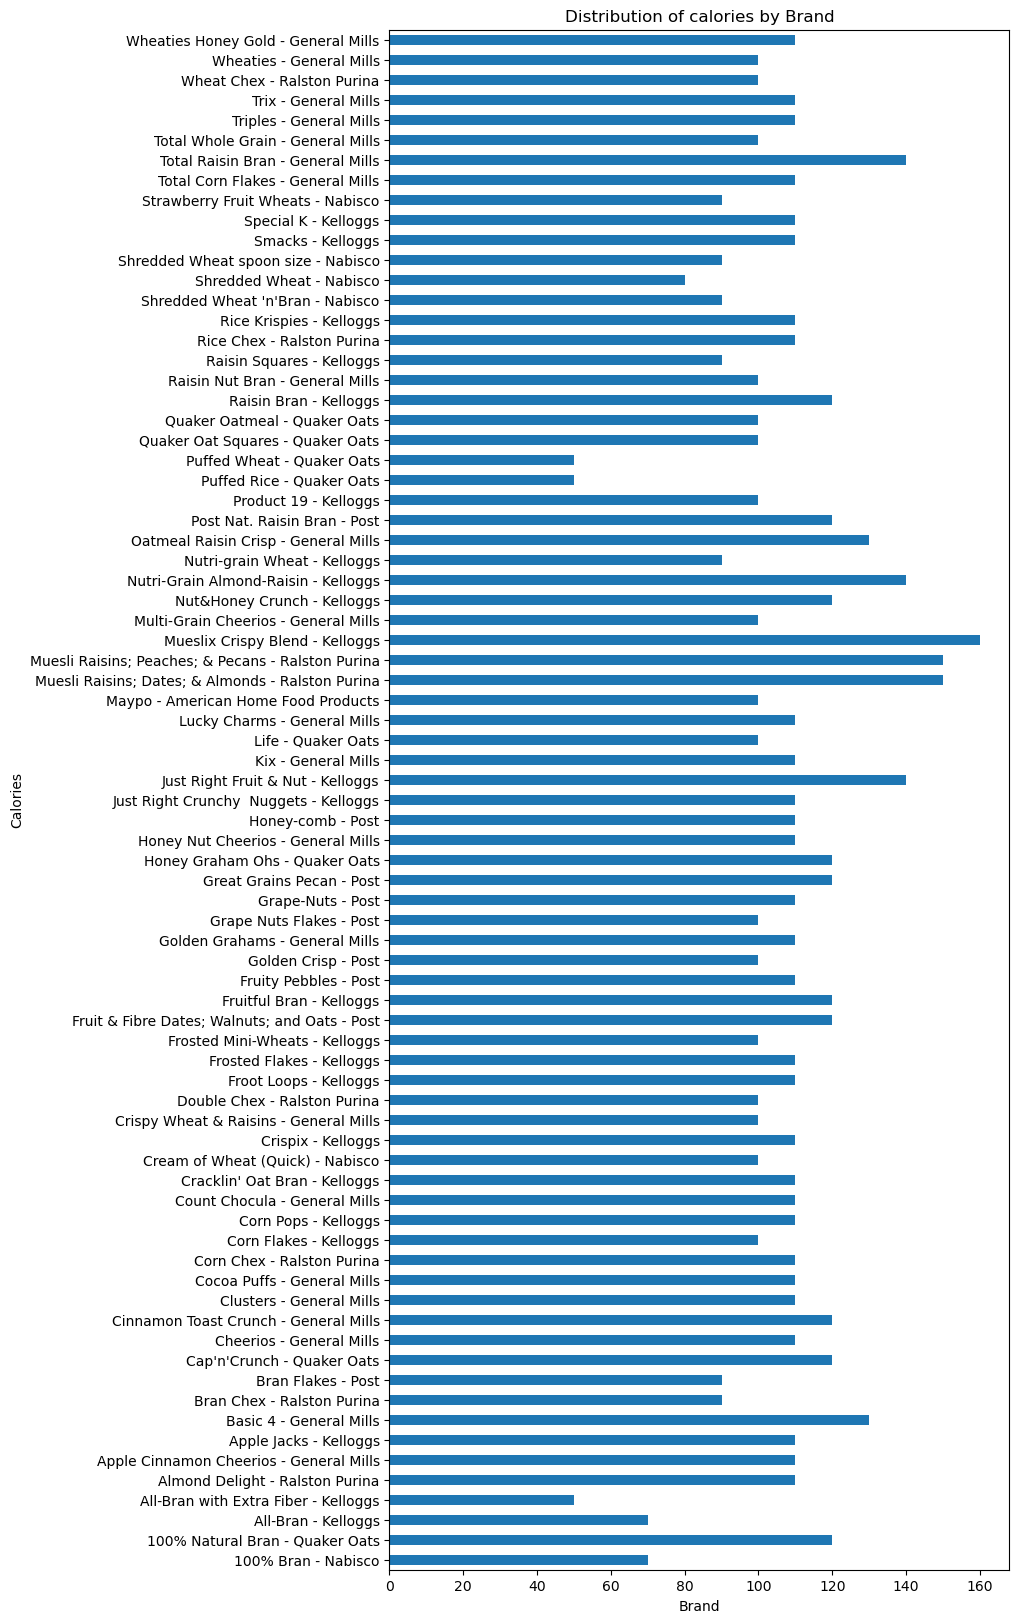

In [79]:
plt.figure(figsize=(8,20))
df.groupby("Brand")["calories"].mean().plot.barh()
plt.title("Distribution of calories by Brand")
plt.xlabel("Brand")
plt.ylabel("Calories")
plt.show()

In [40]:
# Identify the top 3 cereals with the highest and lowest sugar counts
top_3_high_calories = df.nlargest(3, "calories")
top_3_low_calories = df.nsmallest(3, "calories")

print("Top 3 cereals with the highest calories counts:")
print(top_3_high_calories[["Brand", "calories"]])

print("Top 3 cereals with the lowest calories counts:")
print(top_3_low_calories[["Brand", "calories"]])

Top 3 cereals with the highest calories counts:
                                                Brand  calories
46                    Mueslix Crispy Blend - Kelloggs       160
44  Muesli Raisins; Dates; & Almonds - Ralston Purina       150
45  Muesli Raisins; Peaches; & Pecans - Ralston Pu...       150
Top 3 cereals with the lowest calories counts:
                                   Brand  calories
3   All-Bran with Extra Fiber - Kelloggs        50
54             Puffed Rice - Quaker Oats        50
55            Puffed Wheat - Quaker Oats        50


**2. Sugar Analysis and Fiber Analysis**

In [41]:
brand_sugar = df.groupby("Brand")["sugars"].aggregate(["mean", "median", p75])
brand_sugar

,mean,median,p75
Brand,,,
100% Bran - Nabisco,6.0,6.0,6.0
100% Natural Bran - Quaker Oats,8.0,8.0,8.0
All-Bran - Kelloggs,5.0,5.0,5.0
All-Bran with Extra Fiber - Kelloggs,0.0,0.0,0.0
Almond Delight - Ralston Purina,8.0,8.0,8.0
...,...,...,...
Triples - General Mills,3.0,3.0,3.0
Trix - General Mills,12.0,12.0,12.0
Wheat Chex - Ralston Purina,3.0,3.0,3.0


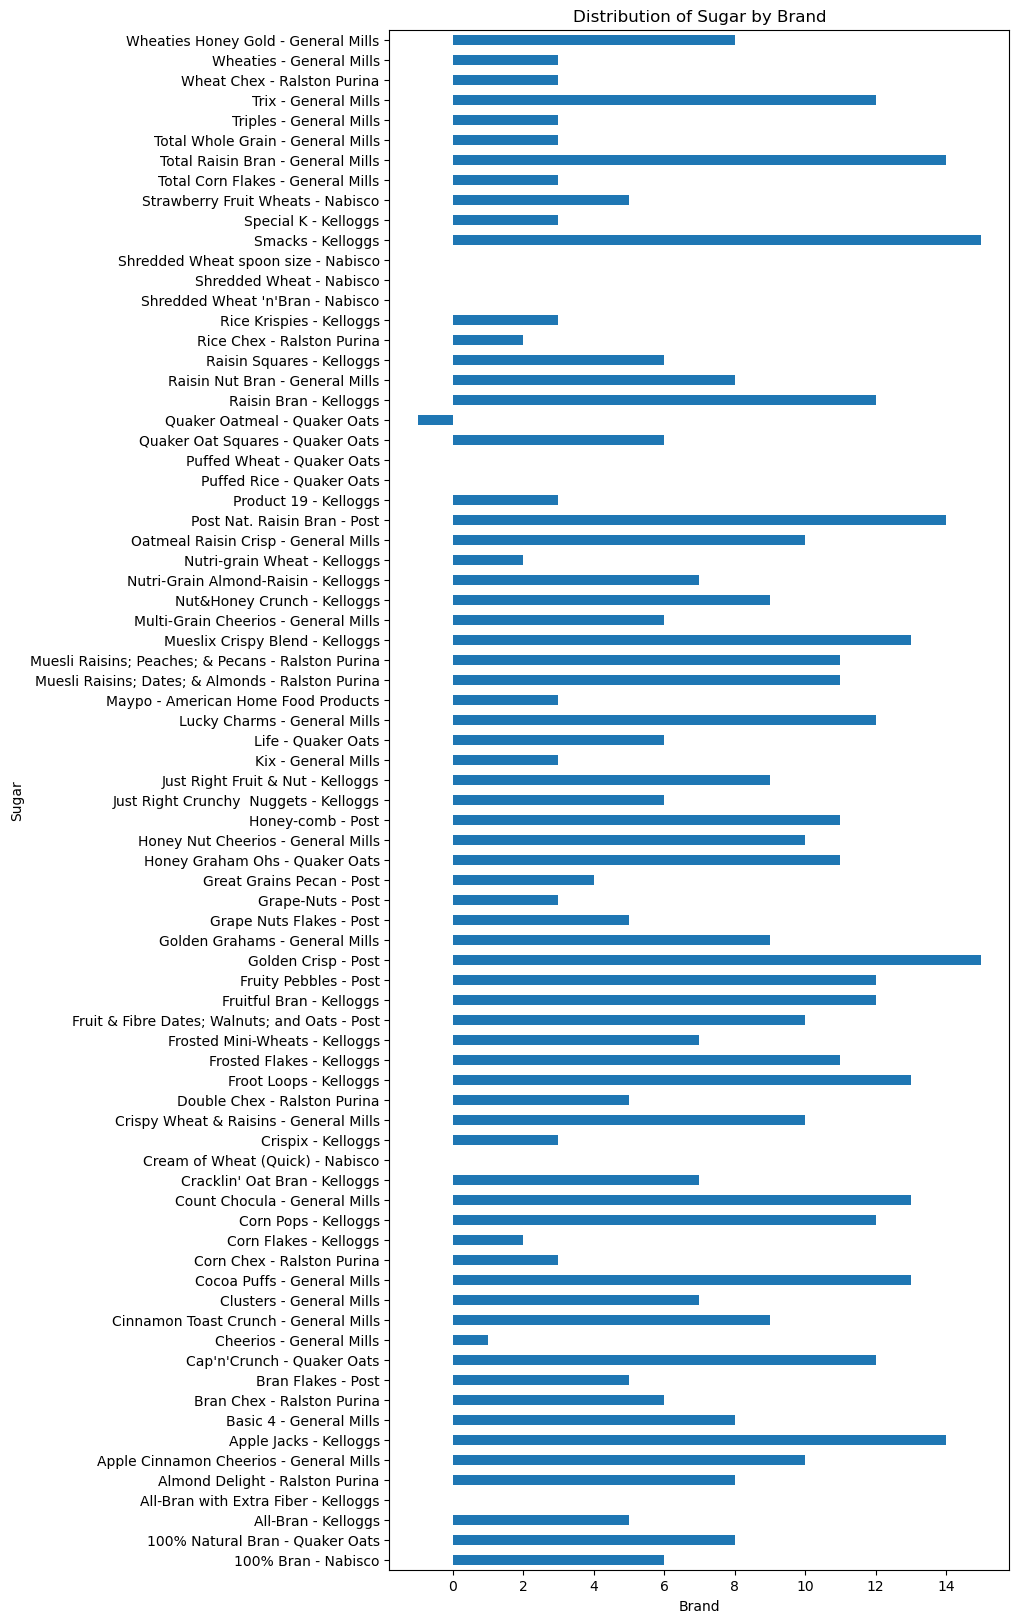

In [80]:
plt.figure(figsize=(8,20))
df.groupby("Brand")["sugars"].mean().plot.barh()
plt.title("Distribution of Sugar by Brand")
plt.xlabel("Brand")
plt.ylabel("Sugar")
plt.show()

In [43]:
# Identify the top 3 cereals with the highest and lowest sugar counts
top_3_high_sugar = df.nlargest(3, "sugars")
top_3_low_sugar = df.nsmallest(3, "sugars")

print("Top 3 cereals with the highest sugar counts:")
print(top_3_high_sugar[["Brand", "sugars"]])

print("Top 3 cereals with the lowest sugar counts:")
print(top_3_low_sugar[["Brand", "sugars"]])

Top 3 cereals with the highest sugar counts:
                     Brand  sugars
30     Golden Crisp - Post      15
66       Smacks - Kelloggs      15
6   Apple Jacks - Kelloggs      14
Top 3 cereals with the lowest sugar counts:
                                   Brand  sugars
57          Quaker Oatmeal - Quaker Oats      -1
3   All-Bran with Extra Fiber - Kelloggs       0
20      Cream of Wheat (Quick) - Nabisco       0


In [44]:
brand_fiber = df.groupby("Brand")["fiber"].aggregate(["mean", "median", p75])
brand_fiber

,mean,median,p75
Brand,,,
100% Bran - Nabisco,10.0,10.0,10.0
100% Natural Bran - Quaker Oats,2.0,2.0,2.0
All-Bran - Kelloggs,9.0,9.0,9.0
All-Bran with Extra Fiber - Kelloggs,14.0,14.0,14.0
Almond Delight - Ralston Purina,1.0,1.0,1.0
...,...,...,...
Triples - General Mills,0.0,0.0,0.0
Trix - General Mills,0.0,0.0,0.0
Wheat Chex - Ralston Purina,3.0,3.0,3.0


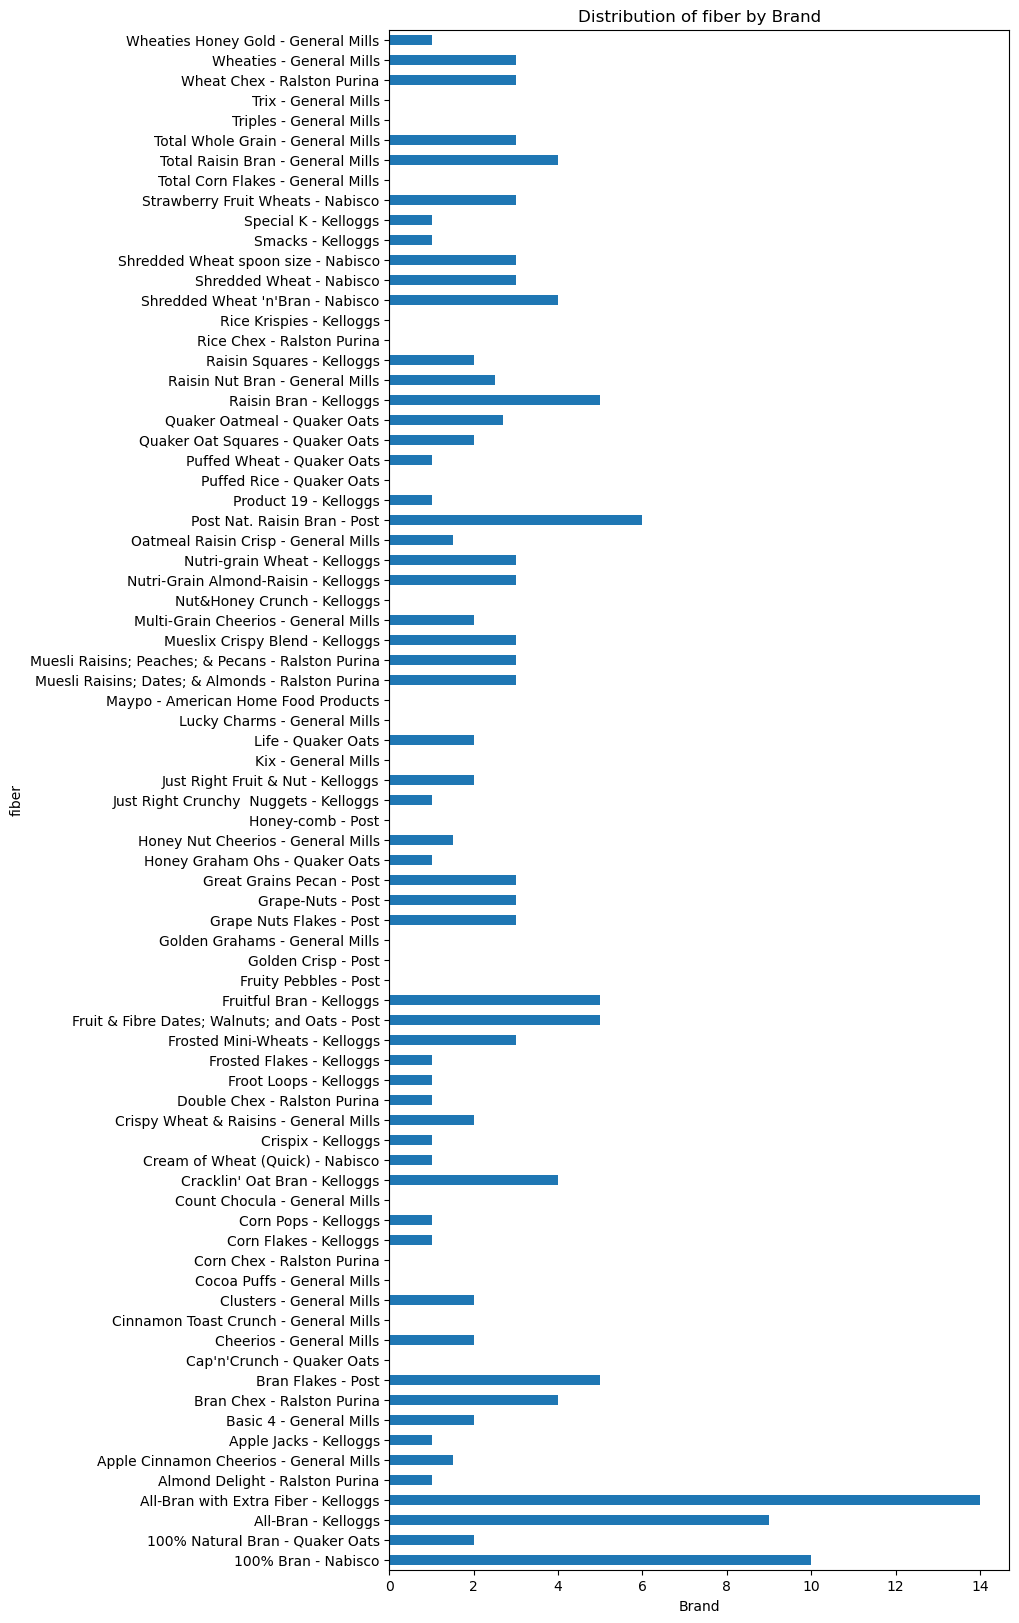

In [81]:
plt.figure(figsize=(8,20))
df.groupby("Brand")["fiber"].mean().plot.barh()
plt.title("Distribution of fiber by Brand")
plt.xlabel("Brand")
plt.ylabel("fiber")
plt.show()

In [46]:
# Identify the top 3 cereals with the highest and lowest fiber counts
top_3_high_fiber = df.nlargest(3, "fiber")
top_3_low_fiber = df.nsmallest(3, "fiber")

print("Top 3 cereals with the highest fiber:")
print(top_3_high_fiber[["Brand", "fiber"]])

print("Top 3 cereals with the lowest fiber:")
print(top_3_low_fiber[["Brand", "fiber"]])

Top 3 cereals with the highest fiber:
                                  Brand  fiber
3  All-Bran with Extra Fiber - Kelloggs   14.0
0                   100% Bran - Nabisco   10.0
2                   All-Bran - Kelloggs    9.0
Top 3 cereals with the lowest fiber:
                                    Brand  fiber
10             Cap'n'Crunch - Quaker Oats    0.0
12  Cinnamon Toast Crunch - General Mills    0.0
14            Cocoa Puffs - General Mills    0.0


**3. Correlation Analysis**

In [47]:
from scipy.stats import spearmanr, kendalltau

In [48]:
# Calculate the Spearman rank correlation matrix
spearman_corr_matrix = df[num_cols].corr(method="spearman")

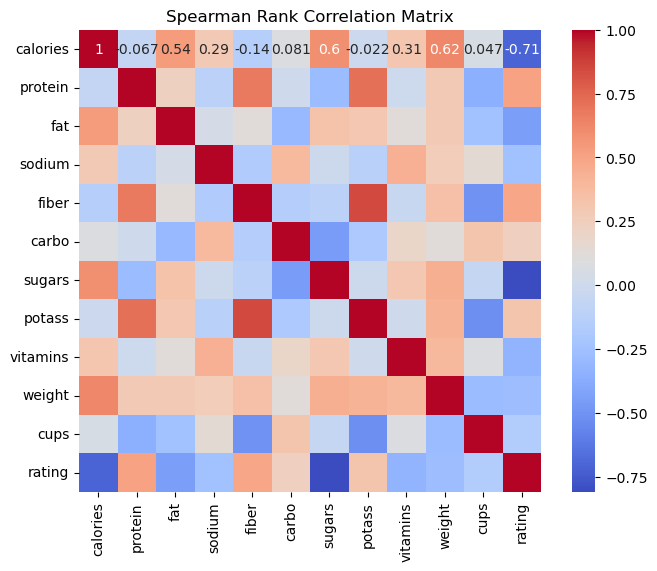

In [82]:
# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Spearman Rank Correlation Matrix")
plt.show()

In [50]:
# Identify the top 5 correlations for each nutrient
top_5_correlations_spearman = []
for i in range(len(spearman_corr_matrix.columns)):
    for j in range(i+1, len(spearman_corr_matrix.columns)):
        if spearman_corr_matrix.iloc[i, j] > 0.5:
            top_5_correlations_spearman.append((spearman_corr_matrix.columns[i], spearman_corr_matrix.columns[j], spearman_corr_matrix.iloc[i, j]))

top_5_correlations_spearman.sort(key=lambda x: x[2], reverse=True)
print("Top 5 correlations (Spearman):")
for correlation in top_5_correlations_spearman[:5]:
    print(f"{correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Top 5 correlations (Spearman):
fiber and potass: 0.85
protein and potass: 0.72
protein and fiber: 0.68
calories and weight: 0.62
calories and sugars: 0.60


## Angle 2: Manufacturer Analysis

**1. Manufacturer Distribution:**

In [51]:
df.mfr.value_counts(normalize=True)

mfr
Kelloggs                       0.298701
General Mills                  0.285714
Post                           0.116883
Ralston Purina                 0.103896
Quaker Oats                    0.103896
Nabisco                        0.077922
American Home Food Products    0.012987
Name: proportion, dtype: float64

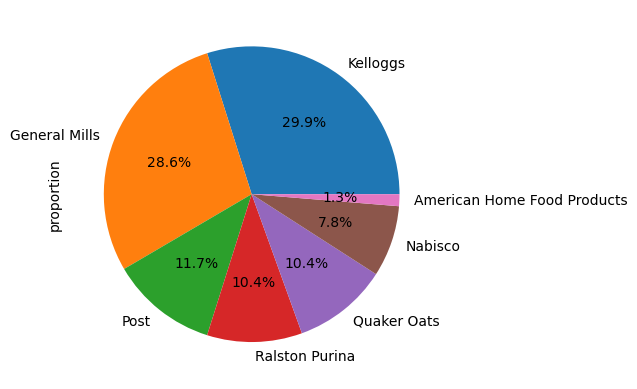

In [52]:
df.mfr.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.show()

<Axes: xlabel='mfr'>

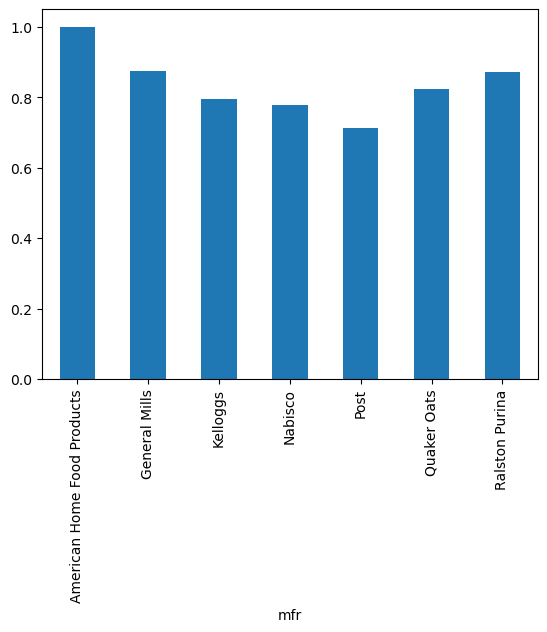

In [53]:
## Distribution of cups (in one serving)
df.groupby('mfr')['cups'].mean().plot.bar()

*By above graph we can understand that :*
*The top 3 brands of cereals purchased by customers are - A = American Home Food Products; G = General Mills and R = Ralston Purina*

**2. Manufacturer-wise Nutritional Analysis:**

In [54]:
nutrients = ['calories', 'protein', 'fat', 'sodium', 'fiber','carbo', 'sugars', 'potass', 'vitamins']

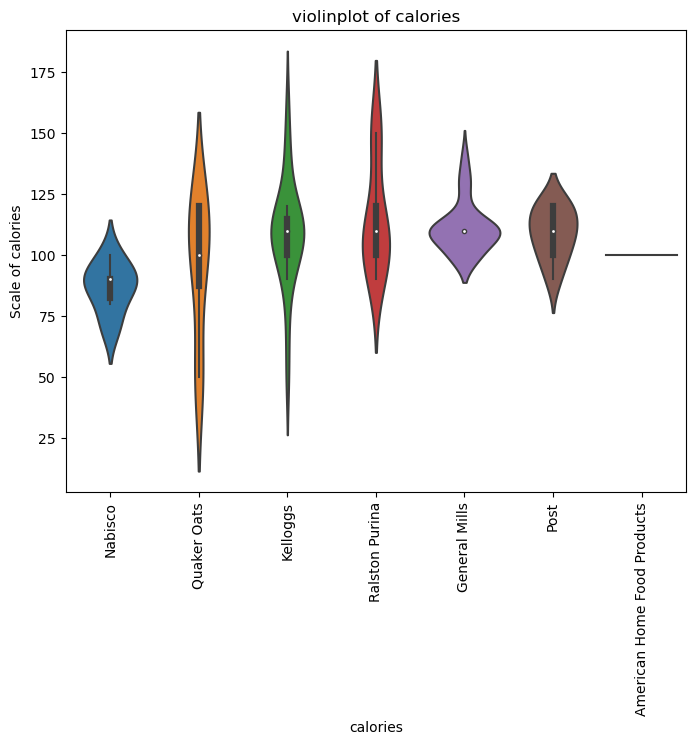

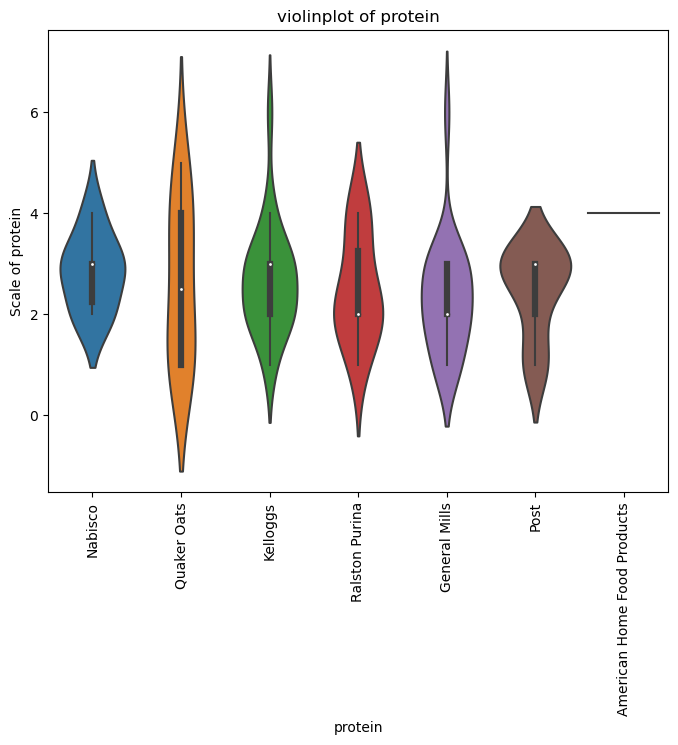

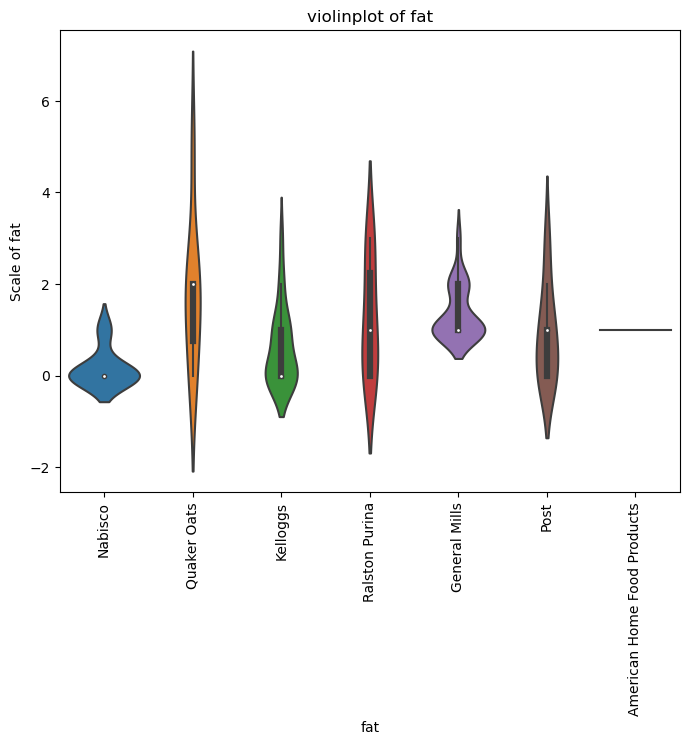

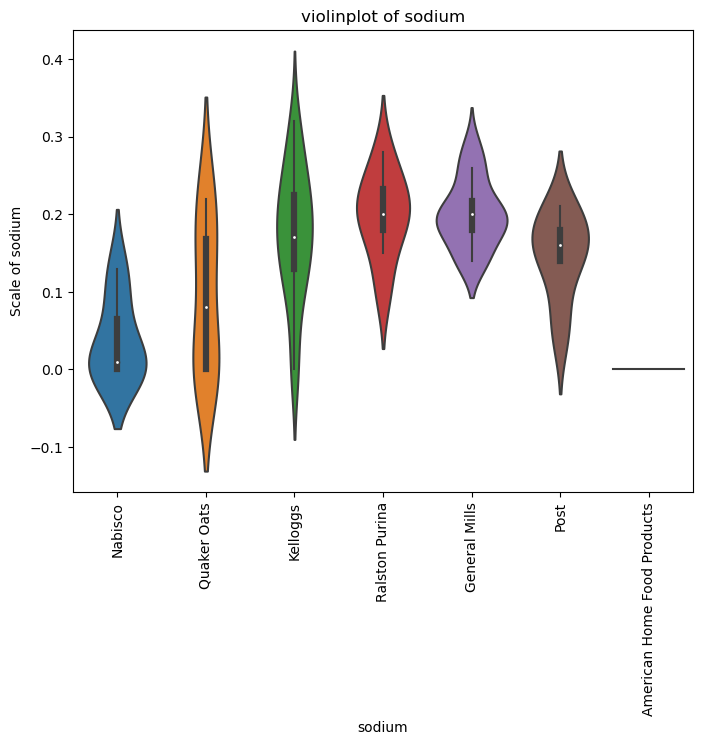

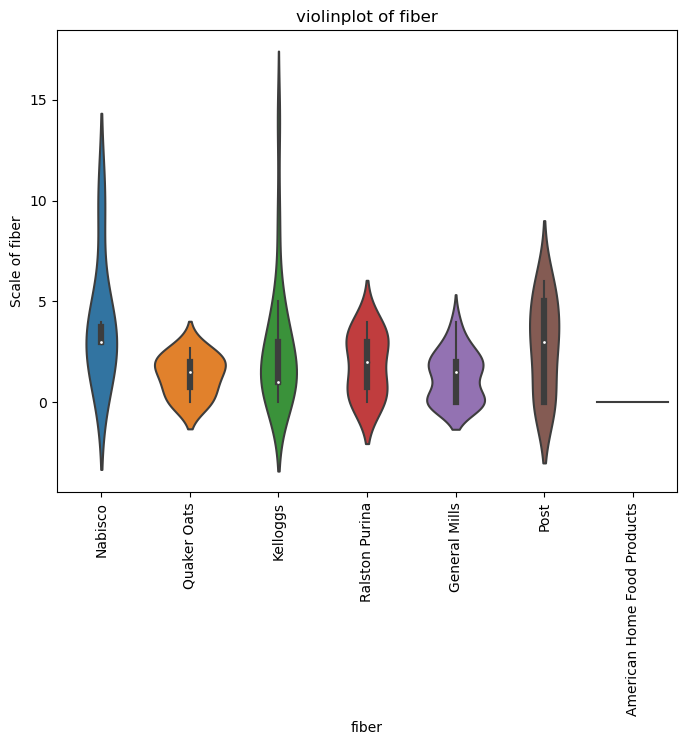

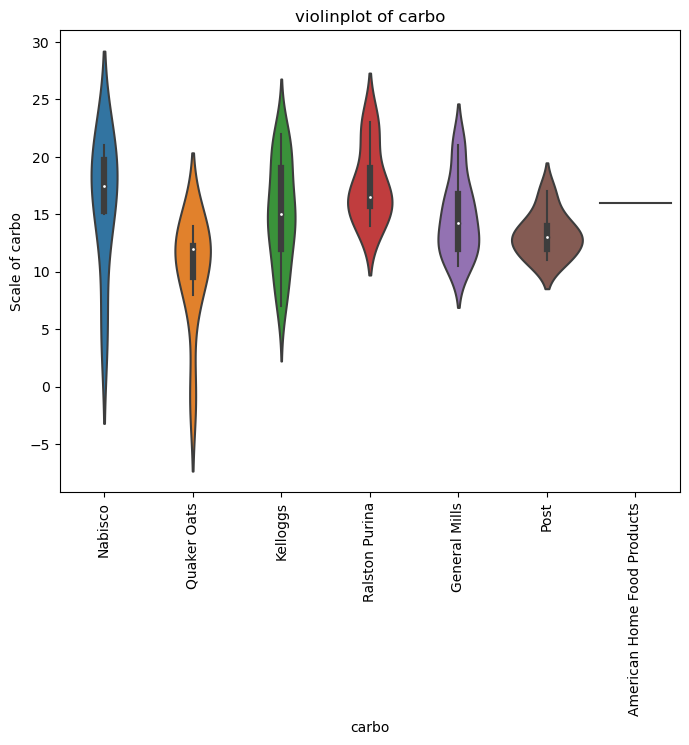

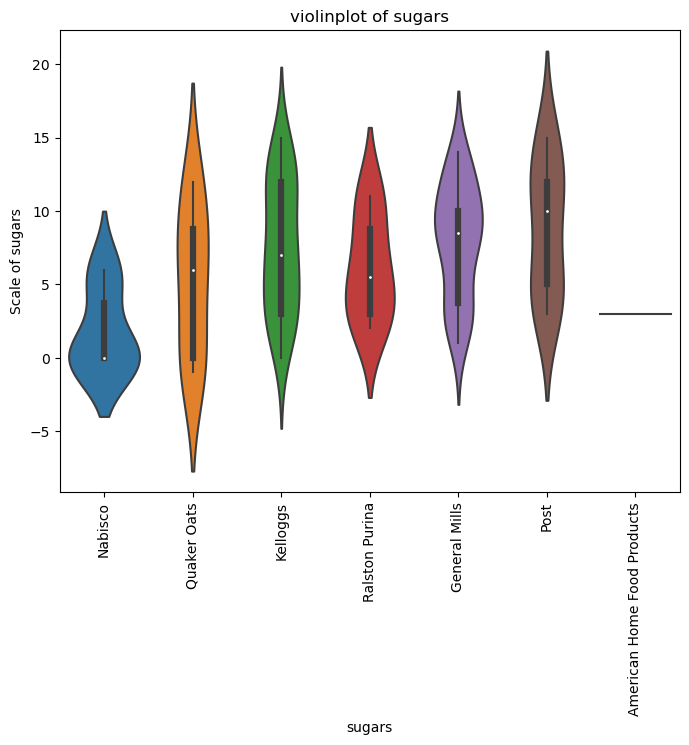

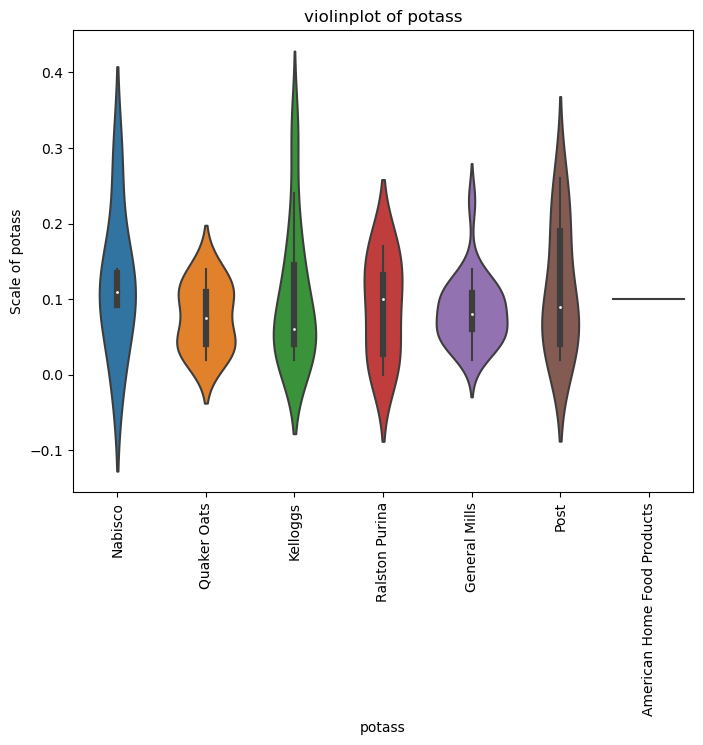

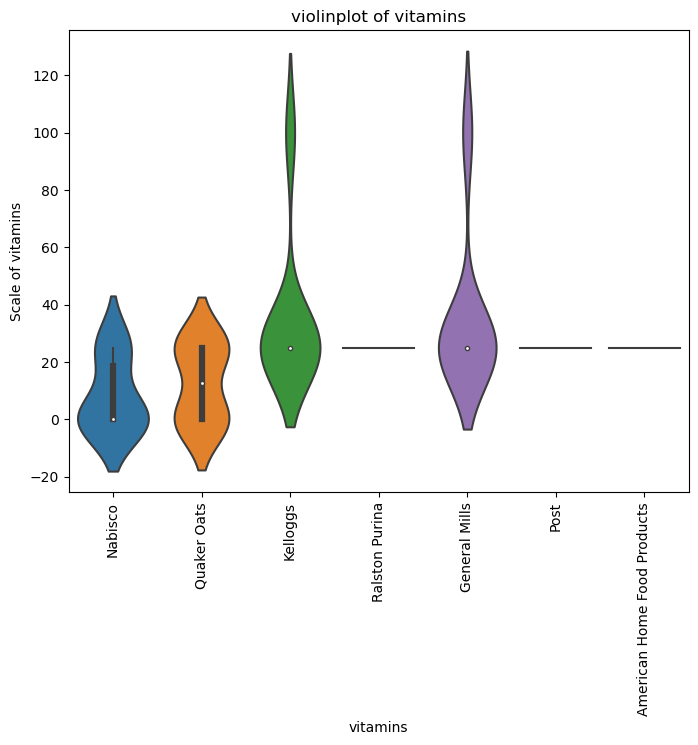

In [85]:
for col in nutrients:
    plt.figure(figsize=(8,6))
    sns.violinplot(x="mfr", y=col, data=df)
    plt.title(f'violinplot of {col}')
    plt.xlabel(col)
    plt.ylabel(f'Scale of {col}')
    plt.xticks(rotation=90)
    plt.show()

In [56]:
# Calculate and print robust measures of central tendency and variability for each nutrient
for col in nutrients:
    for mfr in df["mfr"].unique():
        mfr_data = df[df["mfr"] == mfr]
        print(f"Manufacturer: {mfr}, Nutrient: {col}")
        print(f"Median: {mfr_data[col].median():.2f}")
        print(f"IQR: {mfr_data[col].quantile(0.75) - mfr_data[col].quantile(0.25):.2f}")
        print()

Manufacturer: Nabisco, Nutrient: calories
Median: 90.00
IQR: 7.50

Manufacturer: Quaker Oats, Nutrient: calories
Median: 100.00
IQR: 32.50

Manufacturer: Kelloggs, Nutrient: calories
Median: 110.00
IQR: 15.00

Manufacturer: Ralston Purina, Nutrient: calories
Median: 110.00
IQR: 20.00

Manufacturer: General Mills, Nutrient: calories
Median: 110.00
IQR: 0.00

Manufacturer: Post, Nutrient: calories
Median: 110.00
IQR: 20.00

Manufacturer: American Home Food Products, Nutrient: calories
Median: 100.00
IQR: 0.00

Manufacturer: Nabisco, Nutrient: protein
Median: 3.00
IQR: 0.75

Manufacturer: Quaker Oats, Nutrient: protein
Median: 2.50
IQR: 3.00

Manufacturer: Kelloggs, Nutrient: protein
Median: 3.00
IQR: 1.00

Manufacturer: Ralston Purina, Nutrient: protein
Median: 2.00
IQR: 1.25

Manufacturer: General Mills, Nutrient: protein
Median: 2.00
IQR: 1.00

Manufacturer: Post, Nutrient: protein
Median: 3.00
IQR: 1.00

Manufacturer: American Home Food Products, Nutrient: protein
Median: 4.00
IQR: 0.

**3. Manufacturer-wise Rating Analysis:**

In [57]:
brand_rating = df.groupby("mfr")["rating"].mean()
brand_rating

mfr
American Home Food Products    54.850000
General Mills                  34.485455
Kelloggs                       44.037826
Nabisco                        67.966667
Post                           41.705556
Quaker Oats                    42.916250
Ralston Purina                 41.543750
Name: rating, dtype: float64

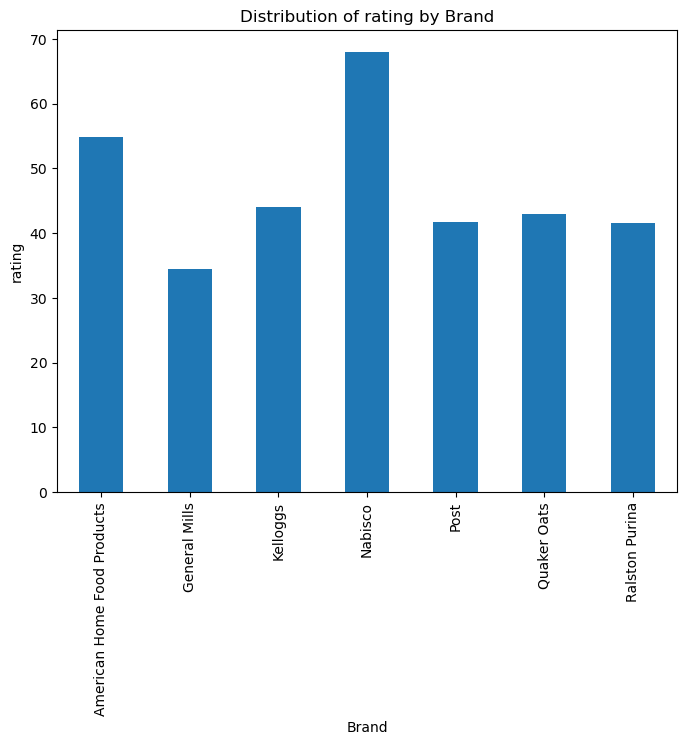

In [86]:
plt.figure(figsize=(8,6))
df.groupby("mfr")["rating"].mean().plot.bar()
plt.title("Distribution of rating by Brand")
plt.xlabel("Brand")
plt.ylabel("rating")
plt.show()

In [59]:
# Identify the top 3 cereals with the highest and lowest rating
top_3_high_ratings = df.nlargest(3, "rating")
top_3_low_ratings = df.nsmallest(3, "rating")

print("Top 3 cereals with the highest rating:")
print(top_3_high_ratings[["mfr", "rating"]])

print("Top 3 cereals with the lowest rating:")
print(top_3_low_ratings[["mfr", "rating"]])

Top 3 cereals with the highest rating:
         mfr  rating
3   Kelloggs   93.70
64   Nabisco   74.47
65   Nabisco   72.80
Top 3 cereals with the lowest rating:
              mfr  rating
10    Quaker Oats   18.04
12  General Mills   19.82
35    Quaker Oats   21.87


## Angle 3: Rating Analysis

**1. Rating Distribution:**

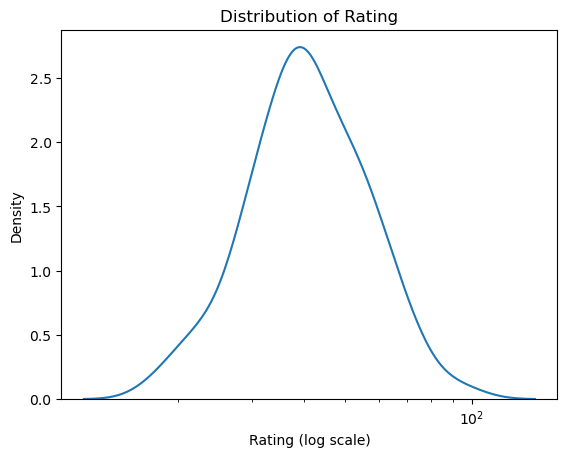

In [60]:
# Creating a density plot with a logarithmic scale
sns.kdeplot(x="rating", data=df, log_scale=True)
plt.title("Distribution of Rating")
plt.xlabel("Rating (log scale)")
plt.ylabel("Density")
plt.show()

In [61]:
brand_rating = df.groupby("Brand")["rating"].aggregate(["mean", "median", p75])
brand_rating

,mean,median,p75
Brand,,,
100% Bran - Nabisco,68.40,68.40,68.40
100% Natural Bran - Quaker Oats,33.98,33.98,33.98
All-Bran - Kelloggs,59.43,59.43,59.43
All-Bran with Extra Fiber - Kelloggs,93.70,93.70,93.70
Almond Delight - Ralston Purina,34.38,34.38,34.38
...,...,...,...
Triples - General Mills,39.11,39.11,39.11
Trix - General Mills,27.75,27.75,27.75
Wheat Chex - Ralston Purina,49.79,49.79,49.79


<Figure size 1000x800 with 0 Axes>

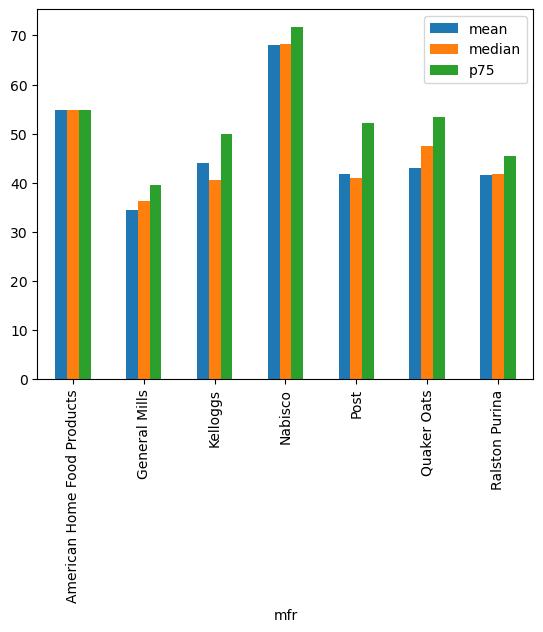

In [62]:
plt.figure(figsize=(10,8))
df.groupby("mfr")["rating"].aggregate(["mean", "median", p75]).plot.bar()
plt.show()

**Correlation with Nutrients:**

In [63]:
# Calculate Spearman rank correlation between rating and each nutrient
correlations = df[["rating"] + nutrients].corr(method="spearman")
print(correlations)

            rating  calories   protein       fat    sodium     fiber  \
rating    1.000000 -0.705181  0.511389 -0.443560 -0.244620  0.489379   
calories -0.705181  1.000000 -0.066970  0.535217  0.292327 -0.142801   
protein   0.511389 -0.066970  1.000000  0.230563 -0.115612  0.680429   
fat      -0.443560  0.535217  0.230563  1.000000  0.034325  0.119626   
sodium   -0.244620  0.292327 -0.115612  0.034325  1.000000 -0.172581   
fiber     0.489379 -0.142801  0.680429  0.119626 -0.172581  1.000000   
carbo     0.241357  0.080772 -0.001905 -0.297343  0.378889 -0.148589   
sugars   -0.809203  0.596302 -0.285281  0.331163 -0.012317 -0.109703   
potass    0.319268 -0.021617  0.716106  0.305654 -0.129273  0.849488   
vitamins -0.332203  0.314042 -0.006971  0.116609  0.440850 -0.042424   

             carbo    sugars    potass  vitamins  
rating    0.241357 -0.809203  0.319268 -0.332203  
calories  0.080772  0.596302 -0.021617  0.314042  
protein  -0.001905 -0.285281  0.716106 -0.006971  
fat

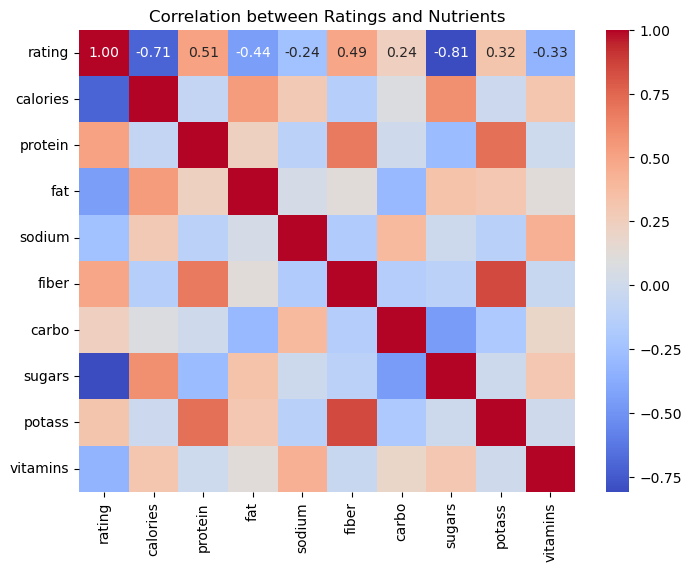

In [87]:
# Visualize the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Ratings and Nutrients")
plt.show()

In [65]:
# The top correlations ( strongest correlations)
top_correlations = correlations["rating"].sort_values(ascending=False)[1:]  # exclude the correlation with itself
print(top_correlations)

protein     0.511389
fiber       0.489379
potass      0.319268
carbo       0.241357
sodium     -0.244620
vitamins   -0.332203
fat        -0.443560
calories   -0.705181
sugars     -0.809203
Name: rating, dtype: float64


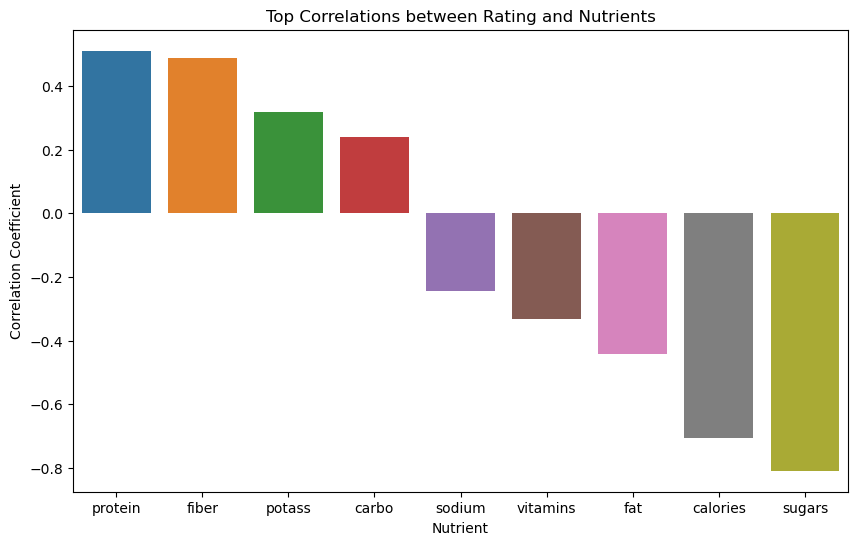

In [89]:
# Plot the top_correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=top_correlations.index, y=top_correlations.values)
plt.title("Top Correlations between Rating and Nutrients")
plt.xlabel("Nutrient")
plt.ylabel("Correlation Coefficient")
plt.show()

**3. Regression Analysis:**

In [67]:
# Select the top k nutrients most strongly correlated with rating
k = 5  # choose the number of top nutrients to select
X = df[nutrients]
y = df["rating"]
selector = SelectKBest(f_regression, k=k)
X_selected = selector.fit_transform(X, y)

In [68]:
selected_nutrients = X.columns[selector.get_support()]

In [69]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Perform Huber regression
huber_reg = HuberRegressor()
huber_reg.fit(X_train, y_train)
y_pred_hub = huber_reg.predict(X_test)

In [70]:
# Print the coefficients and R-squared values for each model
print("Huber Regression:")
print("Coefficients:", huber_reg.coef_)
print("R-squared:", huber_reg.score(X_test, y_test))
print()

Huber Regression:
Coefficients: [-0.18246106  1.99854335 -2.18396766  2.19833439 -1.39045607]
R-squared: 0.9173735579834538



*In this case, the R-squared value is approximately 0.917, which means that the Huber regression model explains about 91.7% of the variability in the response variable (y). This is a relatively high value, indicating that the model is a good fit to the data.*

## Findings :

**Angle 1: Nutritional Analysis**
- Calories: Kellogg's Mueslix Crispy Blend has the most calories, 160 grams, while Quaker Oats' Puffed Wheat has the lowest amount of calories, 50 grams.
- Sugar content: Golden Crisp of Post and Smacks of Kelloggs has the highest sugar content, 15 grams, and Quaker Oatmeal of Quaker Oats has the lowest sugar, -1 gram, followed by Kelloggs All-Bran with Extra Fiber and Nabisco Cream of Wheat (Quick), both with 0 grams.
- Fiber content: Kelloggs All-Bran with Extra Fiber has the highest fiber content (14 grams), while Quaker Oats Cap'n'Crunch, General Mills Cinnamon Toast Crunch, and General Mills Cocoa Puffs have the lowest fiber level (Nil).

- Top 5 correlations for each nutrient:
    - fiber and potass: 0.85
    - protein and potass: 0.72
    - protein and fiber: 0.68
    - calories and weight: 0.62
    - calories and sugars: 0.60

**Angle 2: Manufacturer Analysis**
- The study revealed that Kellogg's manufactures the majority of the cereals in the data-set, followed by General Mills, Post, and others.
- Customers' top three cereal brands are A = American Home Food Products, G = General Mills, and R = Ralston Purina.
- Kelloggs cereals are the highest rated among customers, with a rating of 93.70%, while Quaker Oats are the lowest rated, with a rating of 21.87%.

**Angle 3: Rating Analysis**
- After calculating the mean, median, and p75 of the ratings by brand, we discovered that 100% Bran of Nabisco is ranked the highest among consumers with a rating of 68.40%, while Trix of General Mills is rated the lowest with a rating of 27.75%.
- The strongest correlations with ratings are:
    - protein     0.511389
    - fiber       0.489379
    - potass      0.319268
    - carbo       0.241357
    - sodium     -0.244620
    - vitamins   -0.332203
    - fat        -0.443560
    - calories   -0.705181
    - sugars     -0.809203

**Regression Analysis**
- After analyzing the top five most highly connected nutrients with rating, we obtained the following values:
        - Coefficients: [-0.18246106  1.99854335 -2.18396766  2.19833439 -1.39045607]
        - R-squared: 0.9173735579834538
*The R-squared value is around 0.917, indicating that the Huber regression model explains roughly 91.7% of the variability in the response variable (y). This is a rather high number, indicating that the model is well-suited to the data.*